<a href="https://colab.research.google.com/github/Locke0/sales-prediction/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

filename = '/content/drive/MyDrive/Coding Dojo/Data/sales_predictions.csv'

df = pd.read_csv(filename)
# df.info()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# data cleaning

df['Item_Weight'] = df.loc[:, 'Item_Weight'].interpolate(method = 'linear')
df['Outlet_Size'] = df.loc[:, 'Outlet_Size'].interpolate(method = 'ffill')

# df.drop_duplicates(keep = 'first', inplace = False)
# df.fillna(value=0, inplace=True)
df.info()
df.duplicated().value_counts()
# df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


False    8523
dtype: int64

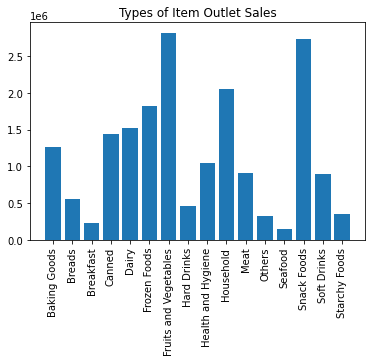

In [142]:
# data visualization
df_ItemType = df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()
# print(df_ItemType)
# df_ItemType
# df1 = df_ItemType.sort_values(by='Item_Outlet_Sales', ascending = False)
# df1
plt.bar(df_ItemType.index, df_ItemType.values)
# type(df1.values)
# type(df1.index)
# df_ItemType.values
# df_ItemType.index
# plt.bar(df_ItemType['Item_Type'], df_ItemType['Item_Outlet_Sales'])
# df1.values.tolist()
# help(plt.bar)
# np.vectorize(df1)

# plt.bar(df2.index, df2.values)
# plt.bar(df1.index, np.vectorize(df1.values))
# df_ItemType.plot.bar()
plt.title('Types of Item Outlet Sales')
plt.xticks(rotation=90);